In [2]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

-------------------------

In [61]:
# Récupération des données de l'API HAL
url = "https://api.archives-ouvertes.fr/search/"
params = {
    'q': 'labStructAcronym_s:"LIRIS"',  # Recherche par acronyme de laboratoire
    'fl': 'title_s,abstract_s,authFullName_s,producedDateY_i,keyword_s', # Champs à récupérer
    'rows': 9  # Nombre de résultats à récupérer 10000 pour avoir tous les résultats
}
response = requests.get(url, params=params)
data = response.json()


In [62]:
#chercher si un auteur a publié plusieurs fois (pour mieux visualiser dans le graphe après)
authors = {}
for doc in data['response']['docs']:
    for author in doc['authFullName_s']:
        if author in authors:
            authors[author] += 1
        else:
            authors[author] = 1
            
for author, count in authors.items():
    if count > 1:
        print(f"{author} a publié {count} fois")
        


Djamal Benslimane a publié 3 fois
Chirine Ghedira a publié 2 fois
Zakaria Maamar a publié 2 fois


In [63]:
G2 = nx.Graph()
# Création des noeuds et des arêtes
for pub in data['response']['docs']:
    # Création du noeud article
    title = pub.get('title_s')[0]
    year = pub['producedDateY_i']
    article_node = f"Article: {title} ({year})"
    G2.add_node(article_node, type='article', year=year)
    
    # Création des noeuds auteurs et des arêtes qui relient les auteurs à l'article
    authors = pub.get('authFullName_s', [])
    for author in authors:
        author_node = f"Auteur: {author}"
        G2.add_node(author_node, type='auteur')
        G2.add_edge(article_node, author_node, relation='WRITTEN_BY')
    
    # Création des noeuds mots-clés et des arêtes qui relient les mots-clés à l'article
    keywords = pub.get('keyword_s', [])
    for keyword in keywords:
        keyword_node = f"Mot-clé: {keyword}"
        G2.add_node(keyword_node, type='mot-clé')
        G2.add_edge(article_node, keyword_node, relation='HAS_KEYWORD')
        

In [64]:
print('Nombre de noeuds:', G2.number_of_nodes())

Nombre de noeuds: 49


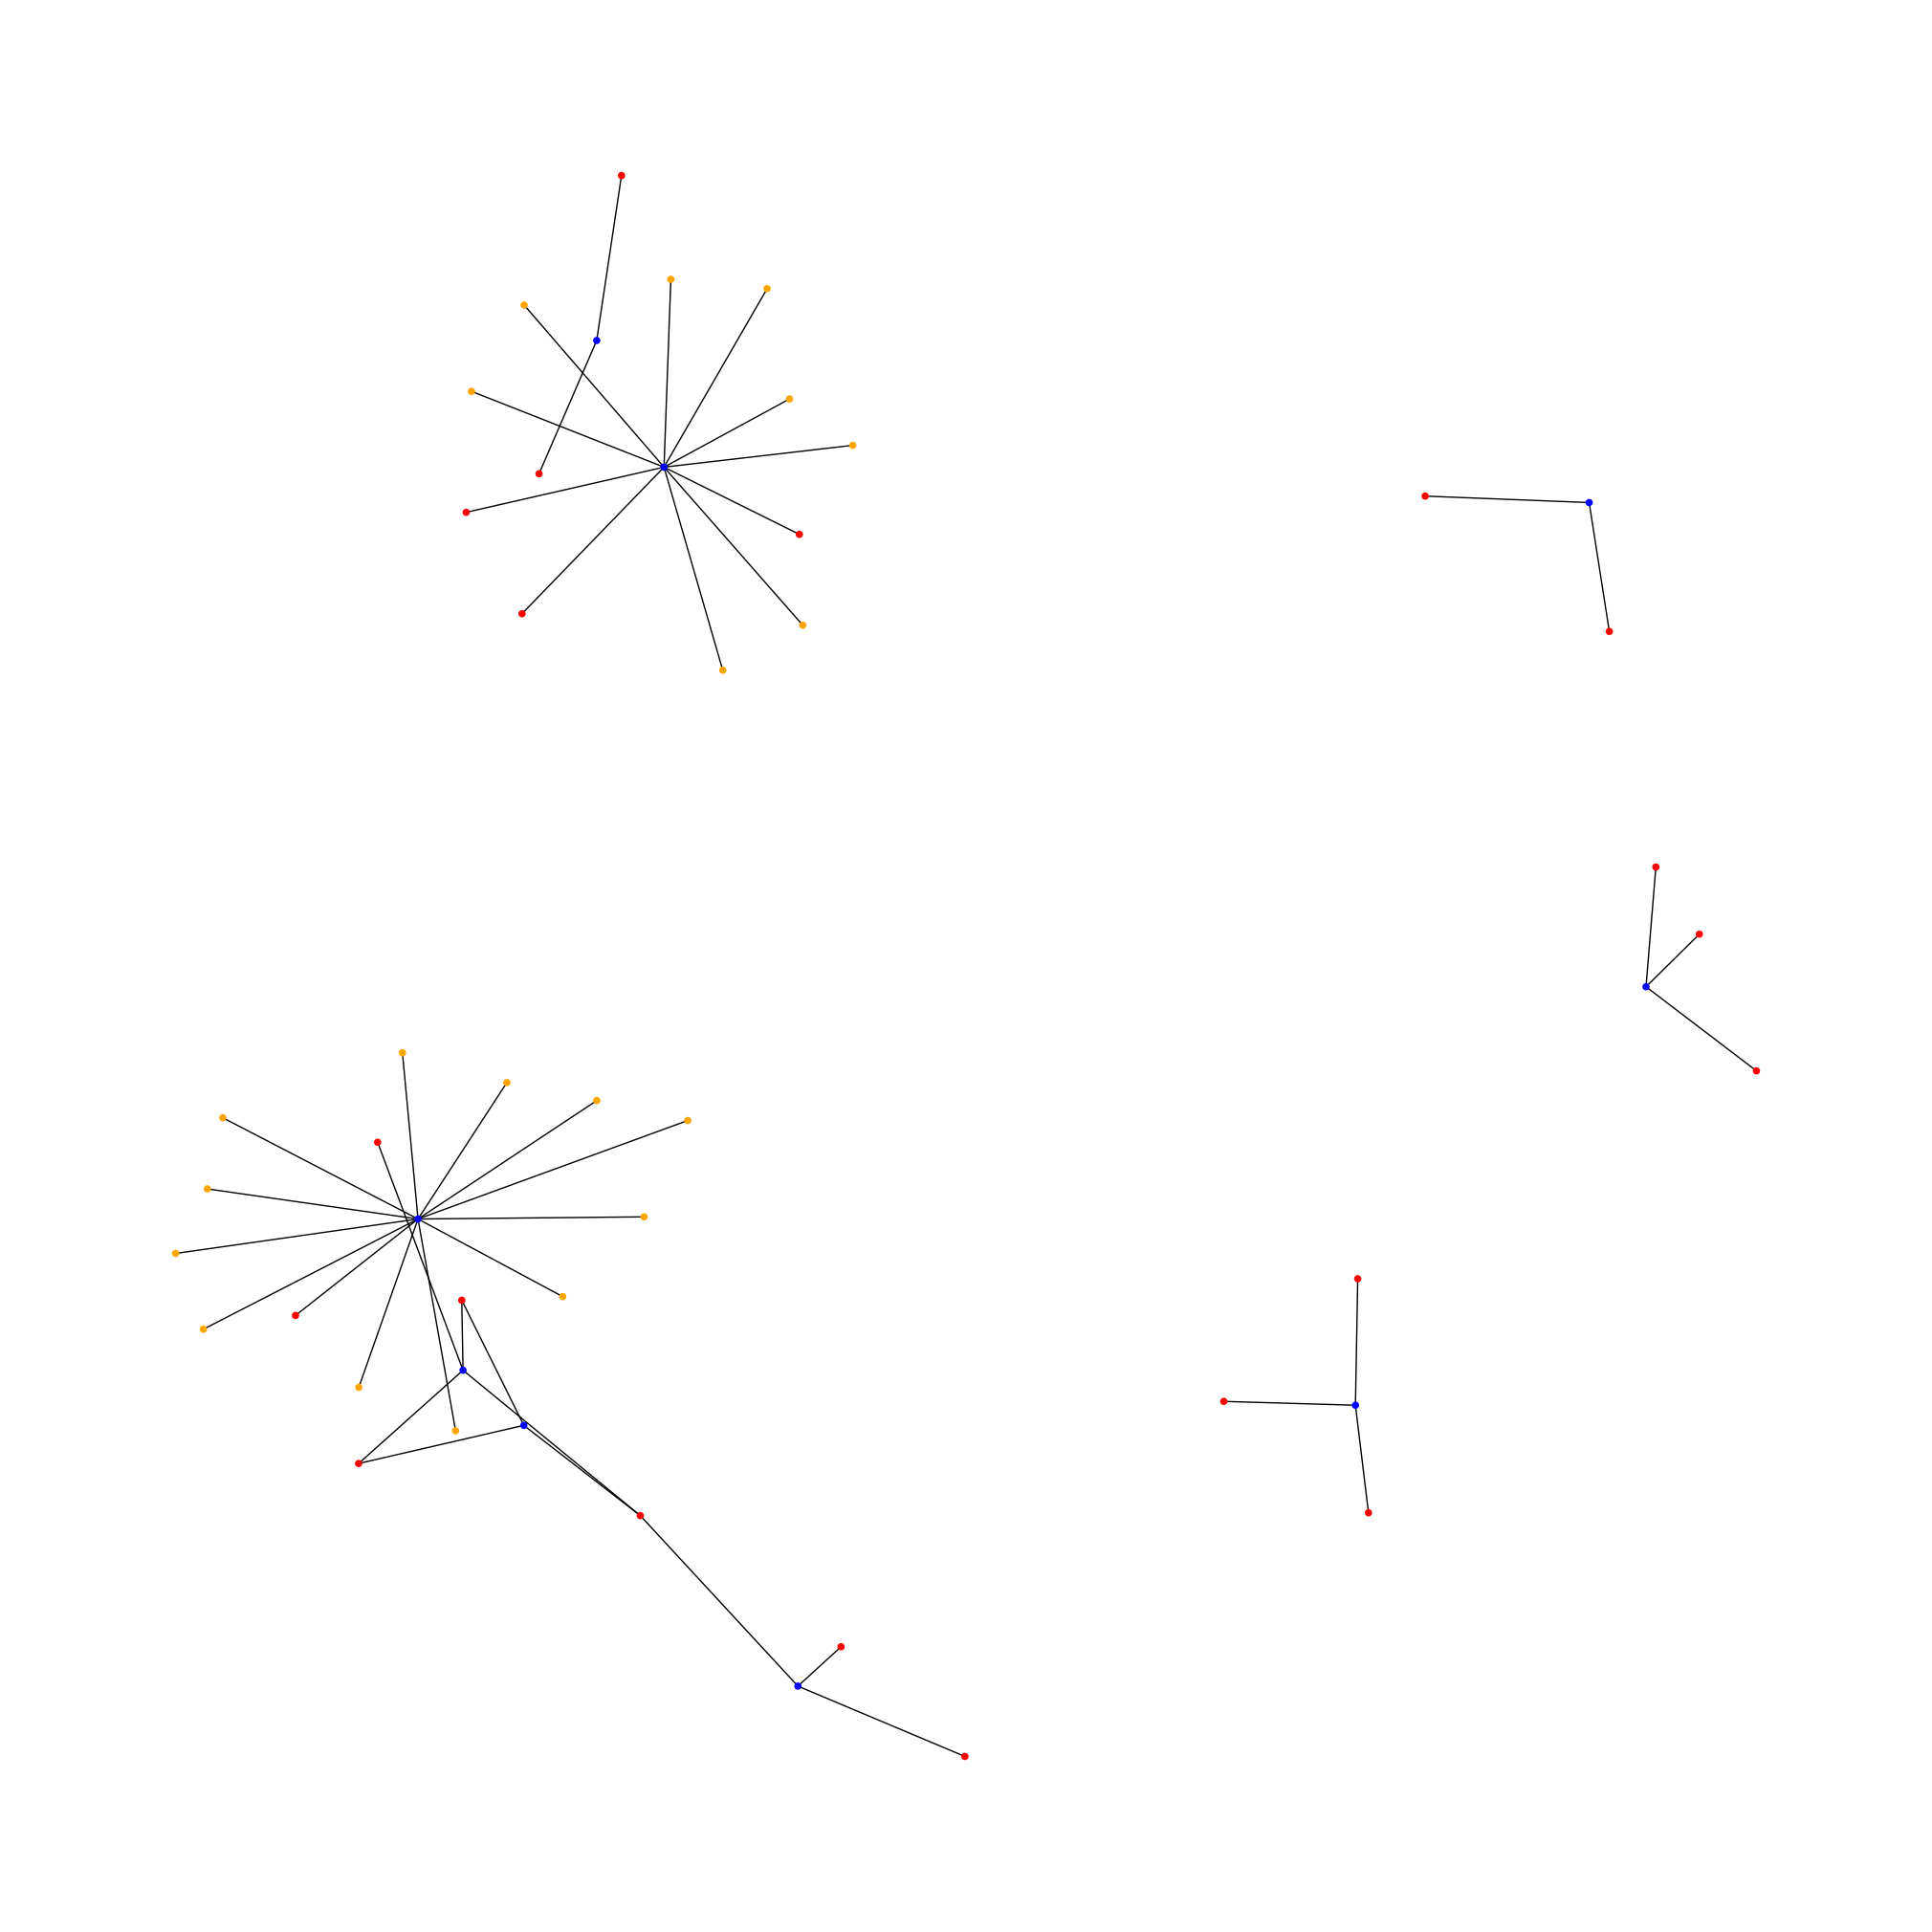

In [70]:
# Visualisation du graphe
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G2, k=0.3)
node_colors = ["blue" if G2.nodes[n]["type"] == "article" 
                   else "red" if G2.nodes[n]["type"] == "auteur" 
                   else "orange" for n in G2.nodes()]
nx.draw(G2, pos, node_size=20, with_labels=False, node_color=node_colors)